<a href="https://colab.research.google.com/github/akashc1/projects/blob/master/PAC_research_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!wget https://aicare.stanford.edu/sep2020.tar.gz
!tar -xvf sep2020.tar.gz

--2020-09-18 05:31:46--  https://aicare.stanford.edu/sep2020.tar.gz
Resolving aicare.stanford.edu (aicare.stanford.edu)... 171.64.68.86
Connecting to aicare.stanford.edu (aicare.stanford.edu)|171.64.68.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224617454 (214M) [application/x-gzip]
Saving to: ‘sep2020.tar.gz.2’

sep2020.tar.gz.2    100%[===================>] 214.21M  24.0MB/s    in 7.6s    

2020-09-18 05:31:53 (28.3 MB/s) - ‘sep2020.tar.gz.2’ saved [224617454/224617454]

hh_data/
hh_data/labels.json
hh_data/mp4/
hh_data/mp4/368.mp4
hh_data/mp4/126.mp4
hh_data/mp4/475.mp4
hh_data/mp4/047.mp4
hh_data/mp4/263.mp4
hh_data/mp4/335.mp4
hh_data/mp4/101.mp4
hh_data/mp4/070.mp4
hh_data/mp4/068.mp4
hh_data/mp4/066.mp4
hh_data/mp4/029.mp4
hh_data/mp4/053.mp4
hh_data/mp4/074.mp4
hh_data/mp4/090.mp4
hh_data/mp4/450.mp4
hh_data/mp4/124.mp4
hh_data/mp4/064.mp4
hh_data/mp4/465.mp4
hh_data/mp4/359.mp4
hh_data/mp4/079.mp4
hh_data/mp4/448.mp4
hh_data/mp4/004.mp4
hh_data

In [85]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import cv2, sys, os
import matplotlib.pyplot as plt
from pathlib import Path
import json

plt.rcParams["figure.figsize"] = (15, 15)
label_data_file = Path('hh_data') / 'labels.json'

In [86]:
!ls hh_data/npy | sort

001.npy
002.npy
003.npy
004.npy
005.npy
006.npy
007.npy
008.npy
011.npy
012.npy
013.npy
014.npy
015.npy
018.npy
020.npy
021.npy
022.npy
023.npy
024.npy
025.npy
026.npy
027.npy
028.npy
029.npy
031.npy
032.npy
033.npy
034.npy
035.npy
036.npy
037.npy
038.npy
040.npy
041.npy
042.npy
043.npy
044.npy
046.npy
047.npy
048.npy
049.npy
050.npy
051.npy
053.npy
054.npy
055.npy
056.npy
057.npy
058.npy
059.npy
060.npy
061.npy
062.npy
063.npy
064.npy
065.npy
066.npy
067.npy
068.npy
069.npy
070.npy
071.npy
072.npy
073.npy
074.npy
076.npy
077.npy
078.npy
079.npy
080.npy
081.npy
082.npy
083.npy
084.npy
085.npy
086.npy
087.npy
089.npy
090.npy
091.npy
093.npy
095.npy
096.npy
097.npy
098.npy
099.npy
100.npy
101.npy
102.npy
103.npy
104.npy
105.npy
106.npy
107.npy
108.npy
109.npy
110.npy
111.npy
112.npy
113.npy
114.npy
115.npy
117.npy
118.npy
119.npy
120.npy
121.npy
122.npy
123.npy
124.npy
125.npy
126.npy
127.npy
129.npy
130.npy
131.npy
132.npy
133.npy
135.npy
136.npy
137.npy
138.npy
139.npy
140.npy
141.npy


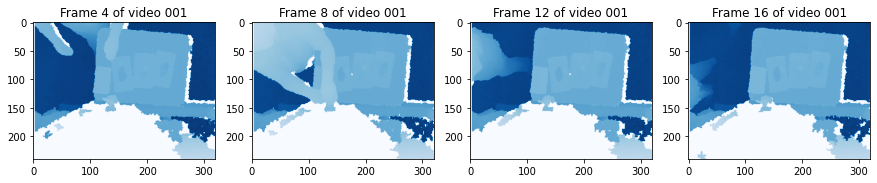

In [87]:
test_vid = np.load('hh_data/npy/001.npy').astype(np.float32)
test_vid.shape

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.title(f'Frame {4 * i} of video 001')
    plt.imshow(test_vid[4 * i], cmap='Blues')


In [88]:
with open(label_data_file, 'r') as f:
    labels = json.load(f)

In [89]:
for key in labels.keys():
    print(f"Key: {key}\tVal: {labels[key]}")

num_vids_npy = len(os.listdir('hh_data/npy'))
num_vids_mp4 = len(os.listdir('hh_data/mp4'))
print(f"num_labels: {len(labels)}\tnum_npy: {num_vids_npy}\tnum_mp4: {num_vids_mp4}")

Key: 001	Val: {'ts': 1548180542000, 'room': 1, 'is_clean': 1}
Key: 002	Val: {'ts': 1548180564000, 'room': 1, 'is_clean': 1}
Key: 003	Val: {'ts': 1548181028000, 'room': 1, 'is_clean': 1}
Key: 004	Val: {'ts': 1548181110000, 'room': 1, 'is_clean': 1}
Key: 005	Val: {'ts': 1548181157000, 'room': 1, 'is_clean': 0}
Key: 006	Val: {'ts': 1548181170000, 'room': 1, 'is_clean': 0}
Key: 007	Val: {'ts': 1548181475000, 'room': 1, 'is_clean': 1}
Key: 008	Val: {'ts': 1548183850000, 'room': 1, 'is_clean': 0}
Key: 009	Val: {'ts': 1548183862000, 'room': 1, 'is_clean': 0}
Key: 010	Val: {'ts': 1548183883000, 'room': 1, 'is_clean': 0}
Key: 011	Val: {'ts': 1548183994000, 'room': 1, 'is_clean': 1}
Key: 012	Val: {'ts': 1548184007000, 'room': 1, 'is_clean': 0}
Key: 013	Val: {'ts': 1548184012000, 'room': 1, 'is_clean': 0}
Key: 014	Val: {'ts': 1548184020000, 'room': 1, 'is_clean': 1}
Key: 015	Val: {'ts': 1548184035000, 'room': 1, 'is_clean': 1}
Key: 016	Val: {'ts': 1548184069000, 'room': 1, 'is_clean': 0}
Key: 017

In [90]:
npy_data_path = Path('hh_data/npy')
npy_files = sorted(os.listdir(npy_data_path))

ind_numid_map = {}
all_x, all_y, weighted_y, all_ids = [], [], [], []
for i, filename in enumerate(npy_files):
    example_num_str = filename.strip().split('.')[0]
    all_x.append(torch.Tensor(np.load(npy_data_path / filename).astype(np.float32)))
    all_y.append(int(labels[example_num_str]['is_clean']))
    all_ids.append(int(example_num_str))

    ind_numid_map[int(example_num_str)] = i

    for _ in range(len(all_x)):
        weighted_y.append(int(labels[example_num_str]['is_clean']))


(array([174., 128.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

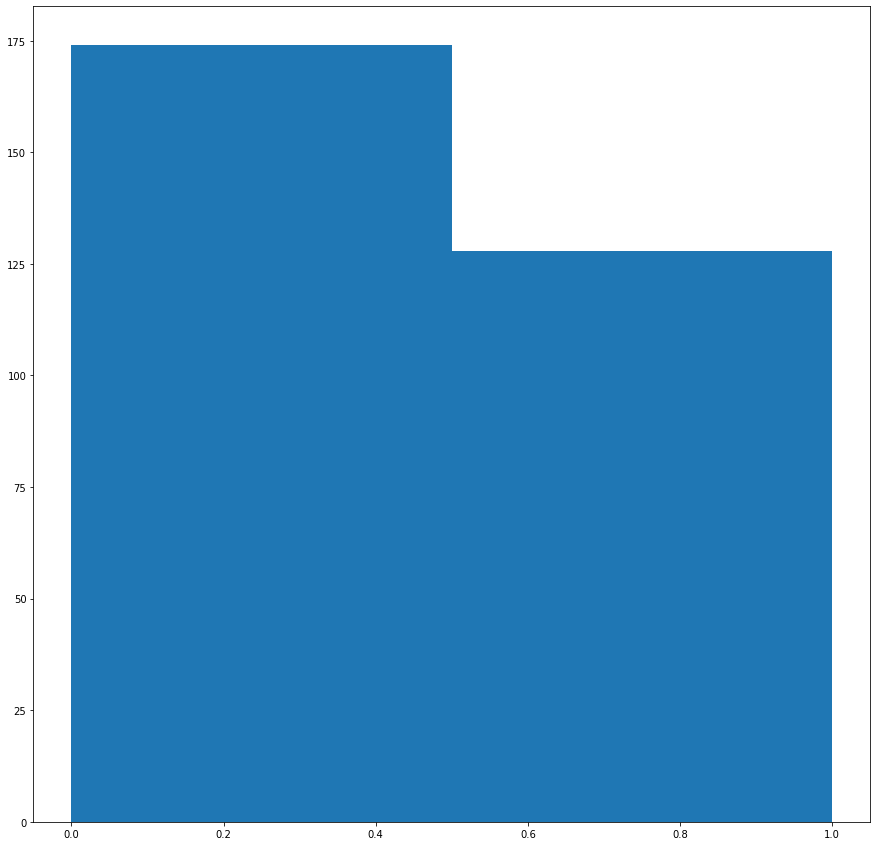

In [91]:
plt.hist(all_y, bins=[0, 0.5, 1])

(array([27487., 18266.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

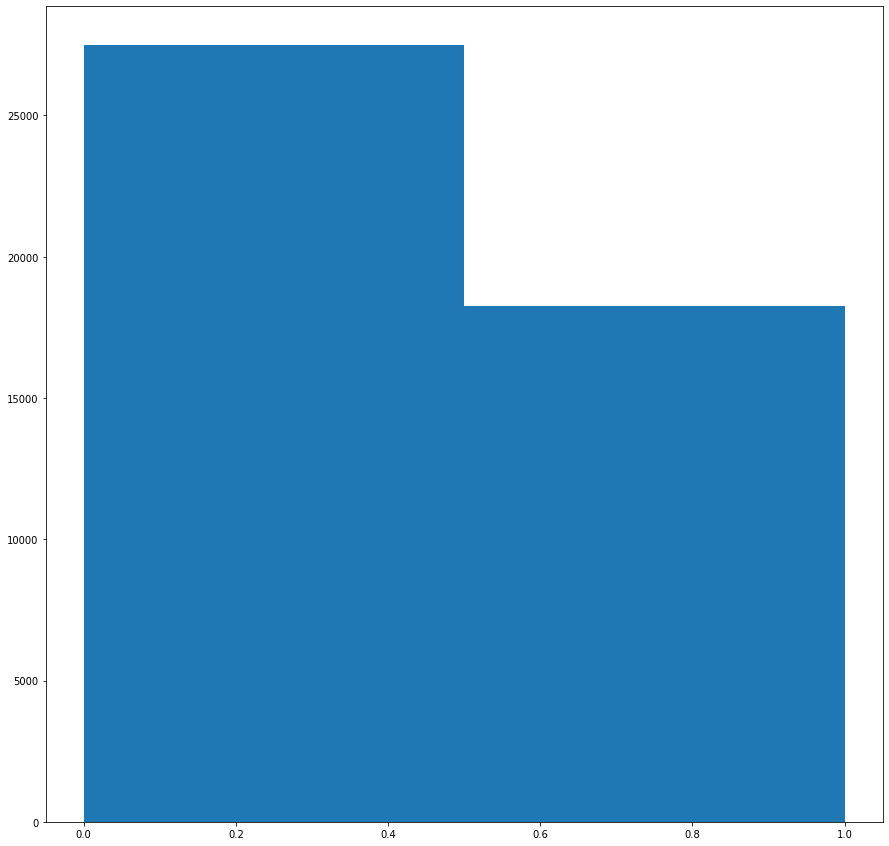

In [92]:
plt.hist(weighted_y, bins=[0, 0.5, 1])

In [93]:
"""
Helper to get an example from the whole dataset
given either a numeric or string representation
of the example's id (ie. both '302' and 302 would work)
"""
def get_example(all_x: list, all_y: list, int_id_map: dict, num_id: int=None, str_id: str=None, index=None):
    
    if num_id is None and str_id is None:
        raise ValueError("Must provide either integer or string id of example!")

    if index is None:
        id = int(str_id) if str_id is not None else num_id
        ind = int_id_map[id]
    else:
        ind = index
    
    num_frames = len(all_x[ind])
    example_y = torch.tensor([all_y[ind] for _ in range(num_frames)], dtype=torch.long)
    
    return torch.unsqueeze(all_x[ind], 1), example_y


"""
Helper to get an example's metadata from the whole dataset
given either a numeric or string representation
of the example's id (ie. both '302' and 302 would work)
"""
def get_metadata(int_id_map: dict, labels: dict, num_id: int=None, str_id: str=None):

    if num_id is None and str_id is None:
        raise ValueError("Must provide either integer or string id of example!")

    id = str_id if str_id is not None else str(num_id)
    return labels[id]

In [94]:
x, y = get_example(all_x, all_y, ind_numid_map, num_id=302)
print(x.shape)
print(y.shape)

print(torch.cuda.is_available())

torch.Size([25, 1, 240, 320])
torch.Size([25])
True


In [95]:
import torchvision
from torchvision import models

# Freeze feature parameters, allow classifier parameters to train

transfer_model = models.resnet50(pretrained=True)
ct = 0

for child in transfer_model.children():
    ct += 1
    if ct < 8:
        for param in child.parameters():
            param.requires_grad = False
           
transfer_model.fc = torch.nn.Sequential(
                        torch.nn.Linear(2048, 256),
                        torch.nn.ReLU(),
                        torch.nn.Dropout(0.4),
                        torch.nn.Linear(256, 2),
                        torch.nn.ReLU())

transfer_model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

transfer_model.cuda()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [96]:
X = torch.unsqueeze(all_x[0], 1).cuda()
test_y = transfer_model(X)
print(test_y)

tensor([[0.3626, 0.0000],
        [0.3043, 0.0000],
        [0.3530, 0.0000],
        [0.4068, 0.0000],
        [0.1972, 0.0000],
        [0.2530, 0.0000],
        [0.2636, 0.0000],
        [0.2732, 0.0818],
        [0.1860, 0.0000],
        [0.3268, 0.0000],
        [0.1672, 0.0000],
        [0.3124, 0.0000],
        [0.3405, 0.0000],
        [0.2879, 0.0000],
        [0.2948, 0.0000],
        [0.3999, 0.0000],
        [0.2257, 0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)


In [97]:
from sklearn.model_selection import train_test_split

train_ids, val_ids = train_test_split(all_ids, train_size=0.8, random_state=20)

def report_metrics(model, x, y):

    if torch.cuda.is_available():
        model.cuda()
        x.cuda()
        y.cuda()

    with torch.no_grad():

        logits = model(x)
        loss = float(F.cross_entropy(logits, y).item())
        y_hat = torch.max(logits, 1)[1]
        del logits

        if torch.cuda.is_available():
            y = y.cpu()
            y_hat = y_hat.cpu()
        
        accuracy = (y == y_hat).numpy().astype(np.float).mean()

        del x, y, y_hat

    return loss, accuracy

def train(model, all_data, train_ids, val_ids, int_id_map, epochs=1, lr=3e-3, wd=1e-5):

    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    all_x, all_y = all_data

    train_loss, val_loss, train_acc, val_acc = [], [], [], []
    for epoch in range(epochs):
        
        np.random.shuffle(train_ids)

        for step, ex_id in enumerate(train_ids):

            x, y = get_example(all_x, all_y, ind_numid_map, num_id=ex_id)
            x = x.to(device)
            y = y.to(device)

            logits = model(x)
            loss = F.cross_entropy(logits, y).cpu()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            del logits, loss
            torch.cuda.empty_cache()

            if step % 10 == 0:
                loss, accuracy = report_metrics(model, x, y)
                train_loss.append(loss)
                train_acc.append(accuracy)

            del x, y, loss, accuracy
            torch.cuda.empty_cache()

        temp_val_loss, temp_val_acc = [], []
        for step, ex_id in enumerate(val_ids):

            x, y = get_example(all_x, all_y, ind_numid_map, num_id=ex_id)
            loss, accuracy = report_metrics(model, x, y)
            temp_val_loss.append(loss)
            temp_val_acc.append(accuracy)
            
            del x, y, loss, accuracy
            torch.cuda.empty_cache()
        
        val_loss.append(temp_val_loss.mean())
        val_acc.append(temp_val_acc.mean())
        torch.cuda.empty_cache()

        print(f"Epoch: {epoch}")
        print(f"Train loss: {train_loss[-1]}\tTrain acc: {train_acc[-1]}")
        print(f"Validation loss: {val_loss[-1]}\tValidation acc: {val_acc[-1]}")

    return train_loss, val_loss, train_acc, val_acc


            


In [98]:
train_loss, val_loss, train_acc, val_acc = train(transfer_model,
                                                 all_data=(all_x, all_y),
                                                 train_ids=train_ids, val_ids=val_ids,
                                                 int_id_map=ind_numid_map,
                                                 epochs=5)

cuda:0


UnboundLocalError: ignored

In [ ]:
torch.cuda.empty_cache()